# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [2]:
import pandas as pd

In [102]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X, y = mnist['data'], mnist['target']

In [103]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Now take a look at the shapes of the X and y matricies 


In [10]:
print('X: ', X.shape,'\ny: ', y.shape)

X:  (70000, 784) 
y:  (70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [15]:
print('X:', X[36000,:],'\ny: ', y[36000])

X: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   4. 149. 255. 184.  12.   0.   0.   0.   0.   0.   0.
   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [16]:
import matplotlib.pyplot as plt

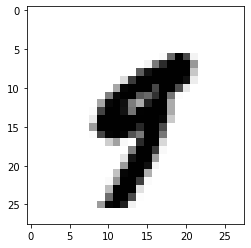

In [19]:
plt.imshow(X[36000,:].reshape(28,28), cmap = plt.cm.binary, interpolation="nearest" )

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [20]:
y[36000]
#it matches

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [23]:
X_train = X[0:60000,:]
X_test = X[60000:,:]

In [65]:
X_train.shape

(60000, 784)

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [109]:
y_train = [1 if number == '5' else 0 for number in y[0:60000]]
y_test = [1 if number == '5' else 0 for number in y[60000:]]
y_todos = [1 if number == '5' else 0 for number in y]

In [67]:
len(y_train)

60000

In [71]:
print(y_train)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [45]:
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
print('intercept: ', model.intercept_,'\ncoef: ', model.coef_)

intercept:  [7.80108161e-05] 
coef:  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.90019028e-06 -6.47939626e-06 -1.43529618e-07 -5.98040074e-09
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.36967286e-08 -4.39069856e-08 -3.56419295e-06 -6.46717610e-06
  -1.39017133e-05 -4.55982544e-05 -2.13476817e-04 -2.00016784e-04
  -2.80880627e-04 -2.78262424e-04 -1.49018073e-04 -2.00525086e-04
  -1.86329935e-04 -8.88158490e-05 -1.38038928e-04 -1.43272471e-04
  -8.50416827e-05 -1.91643029e-05 -2.25250398e-06 -2.10437043e-06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.06

### Does the classifier predict correctly the 36000th digit we picked before?

In [75]:
model.predict(X_train)[36000]

0

In [ ]:
# yes

In [77]:
#quantidade prevista de 5
model.predict(X_test).sum()

819

In [87]:
model.predict(X_test)[-2]

1

In [80]:
##quantidade total de 5, nao necessariamente são os mesmos. modelo previu ter 819 no total enquanto são 892
#modelo pode ter previsto algo que não era 5 como 5.
sum(y_test)

892

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [61]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    def score(self, X, y):
        from sklearn.metrics import accuracy_score
        return accuracy_score(self.predict(X), y)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [62]:
dumb = Never5Classifier()

dumb.fit(X, y)
dumb.score(X, y)

0.0

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [88]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

##### para os testes

In [89]:
confusion_matrix(y_test, model.predict(X_test))

array([[9034,   74],
       [ 147,  745]], dtype=int64)

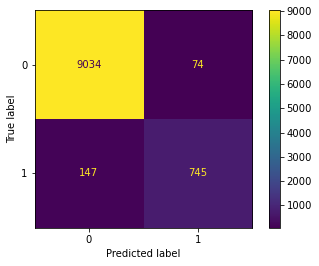

In [90]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')

In [91]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, fbeta_score

In [119]:
precision_test = precision_score(y_test, model.predict(X_test))
recall_test = recall_score(y_test, model.predict(X_test))
f1_test = f1_score(y_test, model.predict(X_test))

In [120]:
print('Precision:',precision_test ,'\nRecall:', recall_test,'\nF1:',f1_test)

Precision: 0.9096459096459096 
Recall: 0.8352017937219731 
F1: 0.8708357685563999


##### De todos os valores (apenas para o valor 5)

In [115]:
precision_todos = precision_score(y_todos, model.predict(X))
recall_todos = recall_score(y_todos, model.predict(X))
f1_todos = f1_score(y_todos, model.predict(X))

In [118]:
print('Precision:',precision_todos ,'\nRecall:', recall_todos,'\nF1:',f1_todos)

Precision: 0.9132095122374587 
Recall: 0.8333597338824648 
F1: 0.8714593341063442


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

Precision: from those who my model said it is 5, i got ~91% correct

Recall:  from all 5's in the dataset, i got ~84% correct

F1: from harmonic mean, i got ~87%. It means i got most of the 5's from the dataset in my model and from those i said its a 5 i got right with a lot of them

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [122]:
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve

In [136]:
roc_curve(y_test,model.predict_proba(X_test)[:, 1])
#pontos da minha curva

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.09793588e-04,
        1.09793588e-04, 2.19587176e-04, 2.19587176e-04, 3.29380764e-04,
        3.29380764e-04, 4.39174352e-04, 4.39174352e-04, 5.48967940e-04,
        5.48967940e-04, 6.58761528e-04, 6.58761528e-04, 7.68555116e-04,
        7.68555116e-04, 8.78348704e-04, 8.78348704e-04, 9.88142292e-04,
        9.88142292e-04, 1.09793588e-03, 1.09793588e-03, 1.20772947e-03,
        1.20772947e-03, 1.31752306e-03, 1.31752306e-03, 1.42731664e-03,
        1.42731664e-03, 1.53711023e-03, 1.53711023e-03, 1.64690382e-03,
        1.64690382e-03, 1.75669741e-03, 1.75669741e-03, 1.86649100e-03,
        1.86649100e-03, 1.97628458e-03, 1.97628458e-03, 2.08607817e-03,
        2.08607817e-03, 2.19587176e-03, 2.19587176e-03, 2.30566535e-03,
        2.30566535e-03, 2.41545894e-03, 2.41545894e-03, 2.52525253e-03,
        2.52525253e-03, 2.63504611e-03, 2.63504611e-03, 2.74483970e-03,
        2.74483970e-03, 2.96442688e-03, 2.96442688e-03, 3.074220

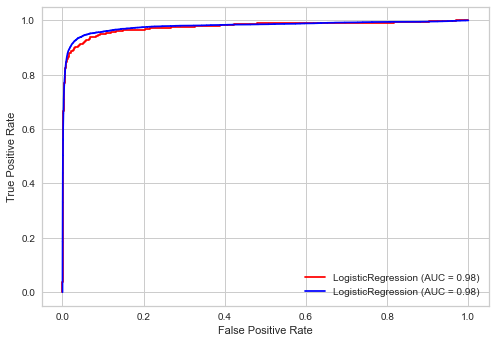

In [138]:
fig, ax = plt.subplots()

plot_roc_curve(model, X_test, y_test, color='red', ax= ax)
plot_roc_curve(model, X_train, y_train, color='blue', ax=ax)
#plot_roc_curve(dumb, X_test, y_test, color='red', ax= ax)

#testar _test com _train e ver a distancia entre eles
#proximidade das curvas indica que não decorou os dados. (modelo com performance parecida com o )
#só o model que varia para esse gráfico já trabalhando anteriomente. 
#aplica meu model nos 2 casos. 

### Now find the roc_auc_score for each. 

In [133]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
#bom resultado de TP e baixo de FP

0.9760923231141597

### Using the yellowbrick library  plot the roc_auc_score curve for the logistic model . 

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also ref

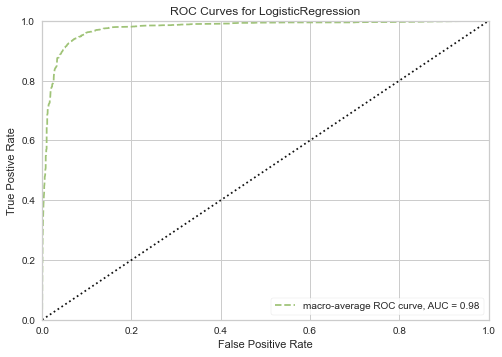

In [134]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
model = LogisticRegression()
visualizer = ROCAUC(model, classes=["non-default", "default"], micro=False, per_class=False)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure


### What does this metric tell you? Which classifier works better with this metric in mind?

In [0]:
#bom resultado de TP e baixo de FP